In [3]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os

In [5]:
with open('SMSSpamCollection.txt','r') as file:
    data= file.read()
   #print(data)

In [6]:
splitted_data =data.split('\n')

In [7]:
x=[]
y=[]
for i in splitted_data:
    email_with_tag=i.split('\t')
    if len(email_with_tag)==2:
        x.append(email_with_tag[1])
        y.append(email_with_tag[0])


In [8]:
len(x) ,len(y)

(5574, 5574)

In [9]:
df=pd.DataFrame({'email_message':x, 'label':y})
df

,email_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will Ã¼ b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


In [10]:
import re ##regular expression special character or numeric hut jaye 
college="jecrc foundation @jaipur 2845445"
re.sub('[^a-zA-Z]',' ',college)

'jecrc foundation  jaipur        '

In [11]:
df['email_message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [12]:
re.sub('[^a-zA-Z]',' ',df['email_message'][0])

'Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   '

In [13]:
for i in range(len(df)):
    message =re.sub('[^a-zA-Z]','  ',df['email_message'][i])
    message = message.lower()
    df['email_message'][i]=message
    

C:\Users\Tanisha Jain\AppData\Local\Temp\ipykernel_1428\1848011998.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['email_message'][i]=message


In [14]:
df.head()

,email_message,label
0,go until jurong point crazy availab...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win f...,spam
3,u dun say so early hor u c alrea...,ham
4,nah i don t think he goes to usf he...,ham


In [15]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

<Axes: >

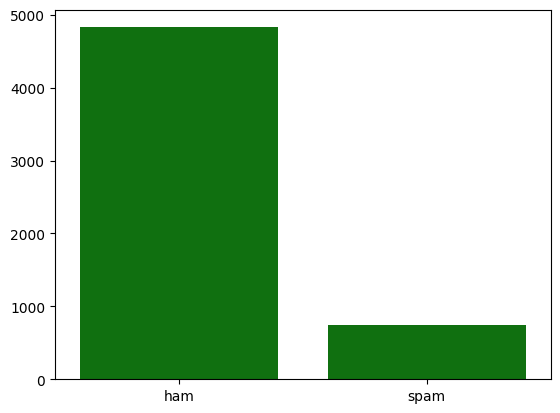

In [16]:
a=list(df['label'].value_counts().keys())
b=list(df['label'].value_counts().values)
sns.barplot(x=a,y=b,color='Green') 


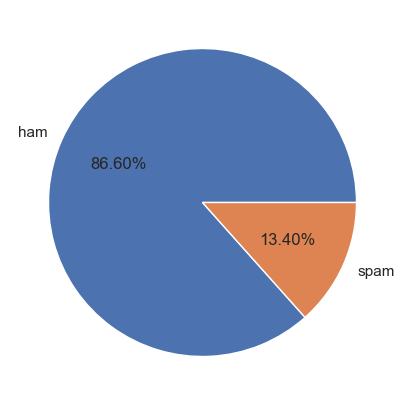

In [17]:
ls=[0,0.5]
sns.set(rc={'figure.figsize':(5,5)})
plt.pie(b,labels=a,autopct="%1.2f%%") 
plt.show() 

In [18]:
ham = df[df['label']=="ham"].sample(1000)
spam = df[df['label']=='spam']

In [19]:
balanced_df=pd.concat([ham,spam])
balanced_df.head()

,email_message,label
3774,i came hostel i m going to sleep p...,ham
3023,how dare you change my ring,ham
4062,aight i ve been set free think you c...,ham
260,i m parked next to a mini w...,ham
877,are you in castor you need to see so...,ham


In [20]:
balanced_df['label']=balanced_df['label'].map({"ham":0,"spam":1})

In [21]:
balanced_df.head()

,email_message,label
3774,i came hostel i m going to sleep p...,0
3023,how dare you change my ring,0
4062,aight i ve been set free think you c...,0
260,i m parked next to a mini w...,0
877,are you in castor you need to see so...,0


In [22]:
x=balanced_df['email_message']
y=balanced_df['label']

In [23]:
x=x.values

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [25]:
bow=CountVectorizer(max_features=2000,stop_words= 'english')

In [26]:
x= bow.fit_transform(x) 

In [27]:
x

<1747x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 14318 stored elements in Compressed Sparse Row format>

In [28]:
x=x.toarray()

In [29]:
x.shape,y.shape

((1747, 2000), (1747,))

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.15)

In [32]:
#from sklearn.linear_model import LinearRegression 

In [33]:
##NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [34]:
mn=MultinomialNB()


In [35]:
mn.fit(x_train,y_train)

MultinomialNB()

In [36]:
mn.score(x_train,y_train)

0.9723719676549866

In [37]:
br=BernoulliNB()

In [40]:
br.fit(x_train,y_train)



BernoulliNB()

In [41]:
br.score(x_train,y_train)

0.9696765498652291

In [42]:
gs=GaussianNB()

In [43]:
gs.fit(x_train,y_train)

GaussianNB()

In [44]:
gs.score(x_train,y_train)

0.9919137466307277

In [45]:
import joblib
joblib.dump(mn,'model.lb')

['model.lb']

In [46]:
bow

CountVectorizer(max_features=2000, stop_words='english')

In [47]:
import joblib
joblib.dump(bow,'bow.lb')

['bow.lb']